In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
image_8bit = cv2.imread("/home/angelika/Desktop/8_term/R_D/ref/termo_ref.png", cv2.IMREAD_GRAYSCALE)

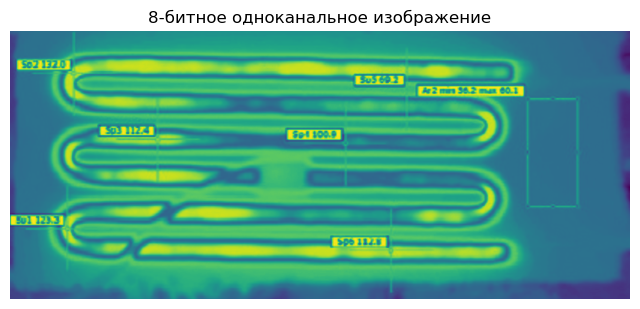

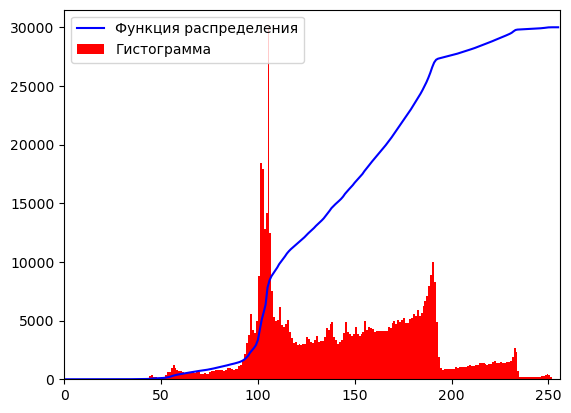

In [6]:
plt.figure(figsize=(8, 6))
plt.imshow(image_8bit)
plt.title('8-битное одноканальное изображение')
plt.axis('off')
plt.show()

hist,bins = np.histogram(image_8bit.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image_8bit.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('Функция распределения','Гистограмма'), loc = 'upper left')
plt.show()

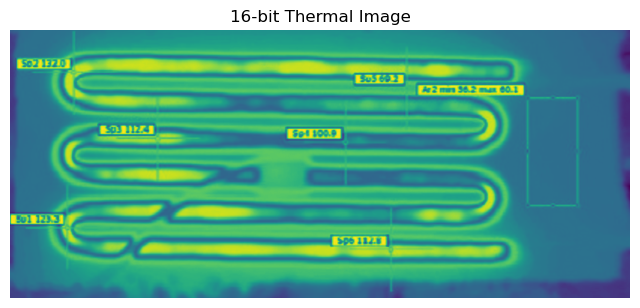

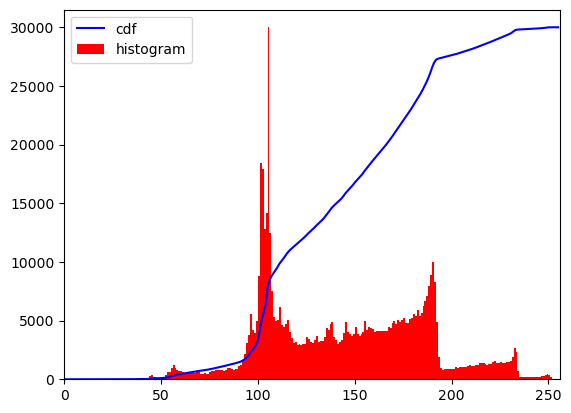

In [9]:
image = image_8bit.astype(np.int16)
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.title('16-bit Thermal Image')
plt.axis('off')
plt.show()
hist,bins = np.histogram(image.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

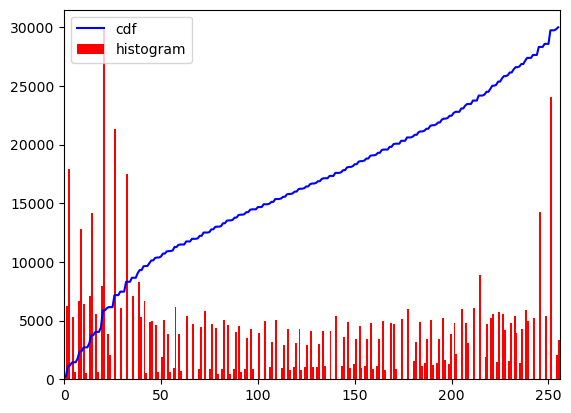

In [10]:
#norm_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
mean, std = image_8bit.mean(), image_8bit.std()
norm_image = ((image_8bit - mean) / std * 255).astype(np.uint8)
hist,bins = np.histogram(norm_image.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(norm_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [19]:
print(len(norm_image))

519


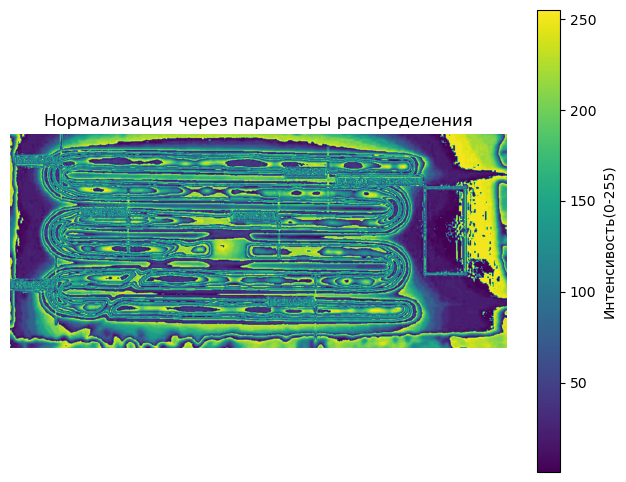

In [15]:
plt.figure(figsize=(8, 6))
plt.imshow(norm_image)
plt.colorbar(label='Интенсивость(0-255)')
plt.title('Нормализация через параметры распределения')
plt.axis('off')
plt.show()

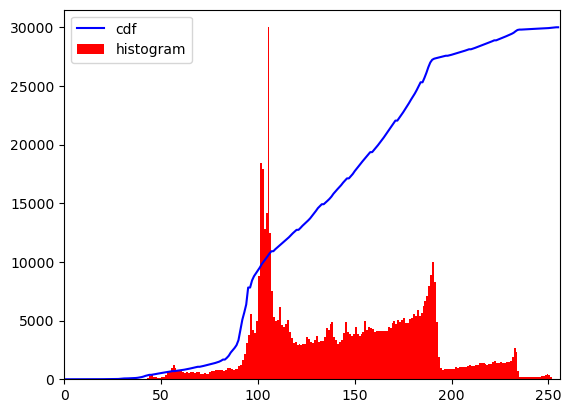

In [35]:
hist,bins = np.histogram(norm_image.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

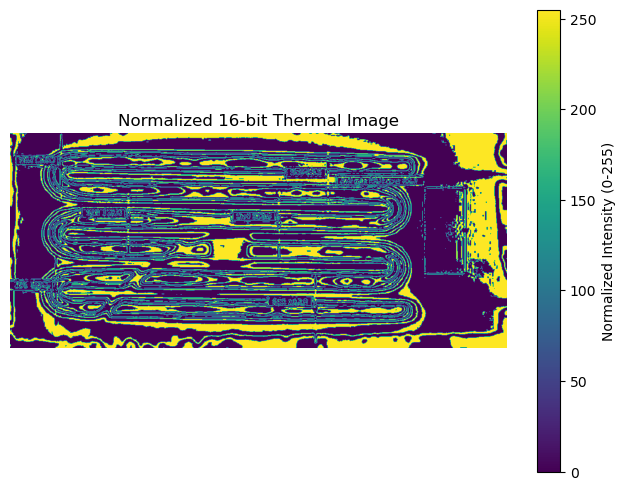

In [16]:
_, mask = cv2.threshold(norm_image, 170, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8, 6))
plt.imshow(mask)
plt.colorbar(label='Normalized Intensity (0-255)')
plt.title('Normalized 16-bit Thermal Image')
plt.axis('off')
plt.show()

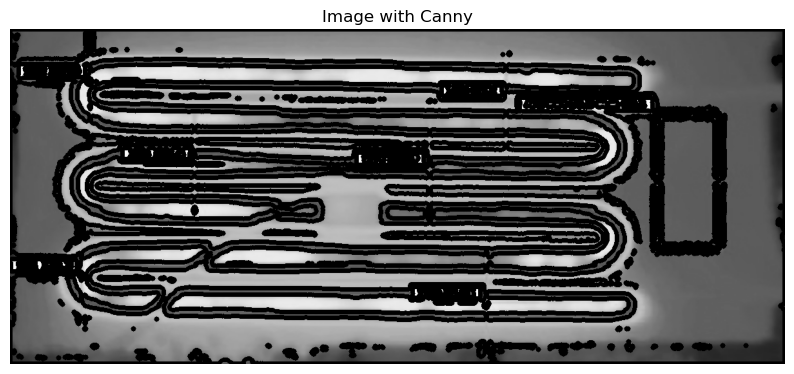

In [53]:
thresh = cv2.adaptiveThreshold(norm_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 31, 7)
# чем больше окно прохода, тем больше нужно вычитать
# plt.figure(figsize=(8, 6))
# plt.imshow(thresh, cmap='hot')
# plt.colorbar(label='Normalized Intensity (0-255)')
# plt.title('Normalized 16-bit Thermal Image')
# plt.axis('off')
# plt.show()
contours, _ = cv2.findContours(thresh, 1, 2)
mask = norm_image.copy()
cv2.drawContours(mask, contours, -1, (0, 0, 0), 6)

mask_image = cv2.bitwise_and(norm_image, mask)

masked_image_rgb = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(masked_image_rgb)
plt.title('Image with Canny')
plt.axis('off')
plt.show()



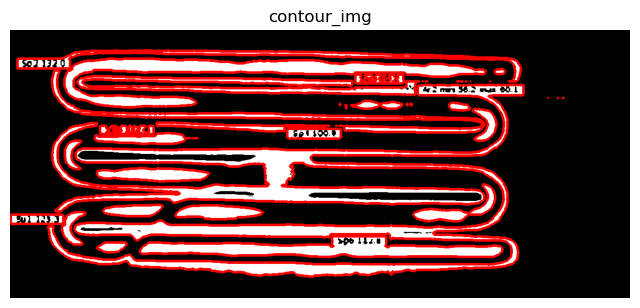

In [82]:
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 3)
plt.figure(figsize=(8, 6))
plt.imshow(contour_img)
plt.title('contour_img')
plt.axis('off')
plt.show()
## графовый анализ_?

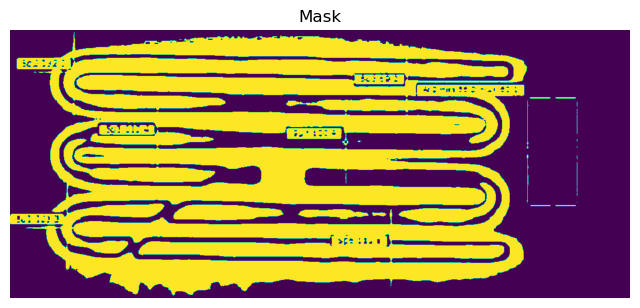

In [77]:
_, mask = cv2.threshold(norm_image, 120, 255, cv2.THRESH_OTSU)
plt.figure(figsize=(8, 6))
plt.imshow(mask)
plt.title('Mask')
plt.axis('off')
plt.show()

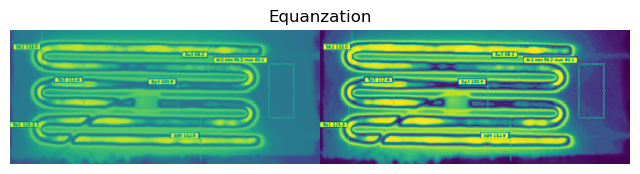

In [9]:
equ = cv2.equalizeHist(image_8bit)
res = np.hstack((image, equ))
plt.figure(figsize=(8, 6))
plt.imshow(res)
plt.title('Equanzation')
plt.axis('off')
plt.show()

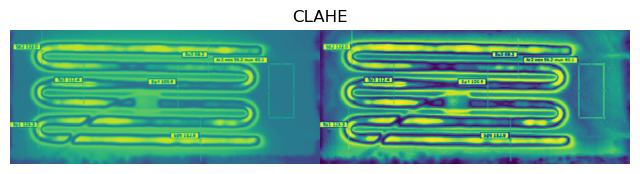

In [10]:
clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(8,8))
cl1 = clahe.apply(image_8bit)
equ = cv2.equalizeHist(image_8bit)
res = np.hstack((image, cl1))
plt.figure(figsize=(8, 6))
plt.imshow(res)
plt.title('CLAHE')
plt.axis('off')
plt.show()

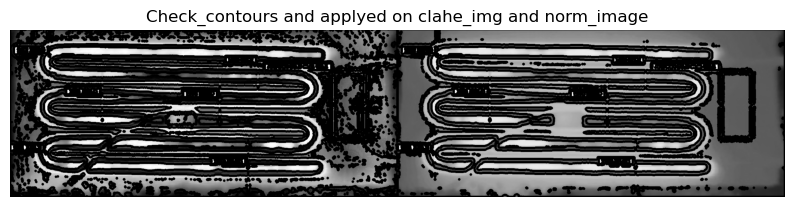

In [11]:
thresh = cv2.adaptiveThreshold(cl1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 31, 7)
thresh_1 = cv2.adaptiveThreshold(norm_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 31, 7)
# чем больше окно прохода, тем больше нужно вычитать
# plt.figure(figsize=(8, 6))
# plt.imshow(thresh, cmap='hot')
# plt.colorbar(label='Normalized Intensity (0-255)')
# plt.title('Normalized 16-bit Thermal Image')
# plt.axis('off')
# plt.show()
contours, _ = cv2.findContours(thresh, 1, 2)
mask = cl1.copy()
cv2.drawContours(mask, contours, -1, (0, 0, 0), 6)

mask_image = cv2.bitwise_and(cl1, mask)

masked_image_rgb = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)


contours1, _ = cv2.findContours(thresh_1, 1, 2)
mask1 = norm_image.copy()
cv2.drawContours(mask1, contours1, -1, (0, 0, 0), 6)

mask_image1 = cv2.bitwise_and(norm_image, mask1)

masked_image_rgb1 = cv2.cvtColor(mask_image1, cv2.COLOR_BGR2RGB)

res = np.hstack((masked_image_rgb, masked_image_rgb1))


plt.figure(figsize=(10, 6))
plt.imshow(res)
plt.title('Check_contours and applyed on clahe_img and norm_image')
plt.axis('off')
plt.show()



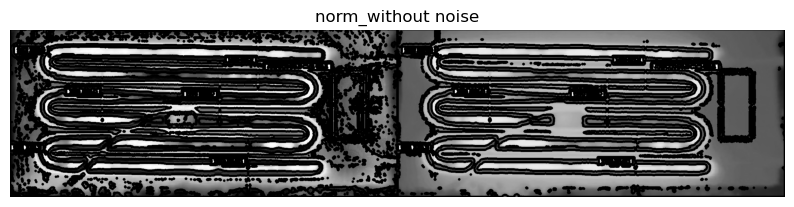

In [12]:
# Убираем шум морфологической операцией — удаляем мелкие пятна
kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(masked_image_rgb1, cv2.MORPH_OPEN, kernel, iterations=1)
plt.figure(figsize=(10, 6))
plt.imshow(res)
plt.title('norm_without noise')
plt.axis('off')
plt.show()

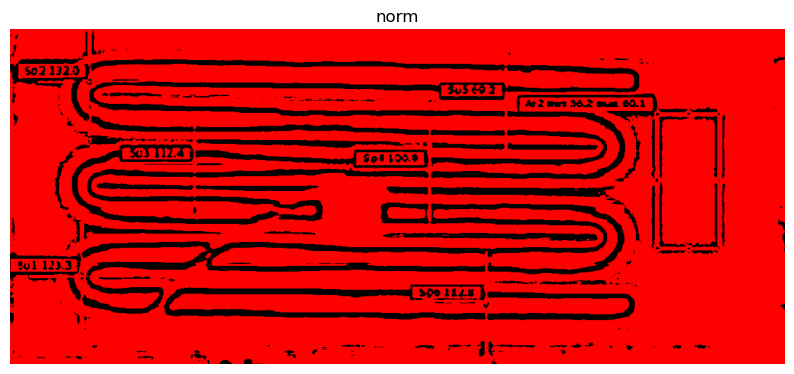

In [14]:
mask_new = np.zeros_like(masked_image_rgb1)

# Рисуем контуры на маске (заливка цветом 255)
cv2.drawContours(mask_new, contours1, -1, 255, thickness=cv2.FILLED)
plt.figure(figsize=(10, 6))
plt.imshow(mask_new)
plt.title('norm')
plt.axis('off')
plt.show()


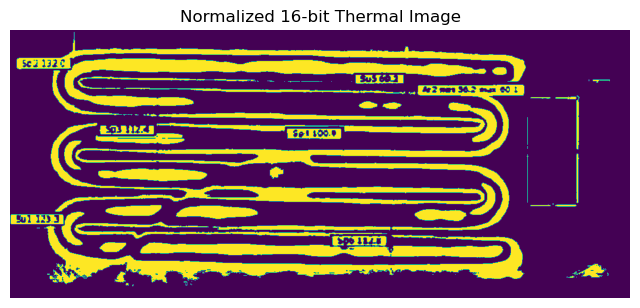

In [69]:
_, mask = cv2.threshold(cl1, 175, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(8, 6))
plt.imshow(mask)
plt.title('Normalized 16-bit Thermal Image')
plt.axis('off')
plt.show()

## Morphological Transformations
### 1. Erosion

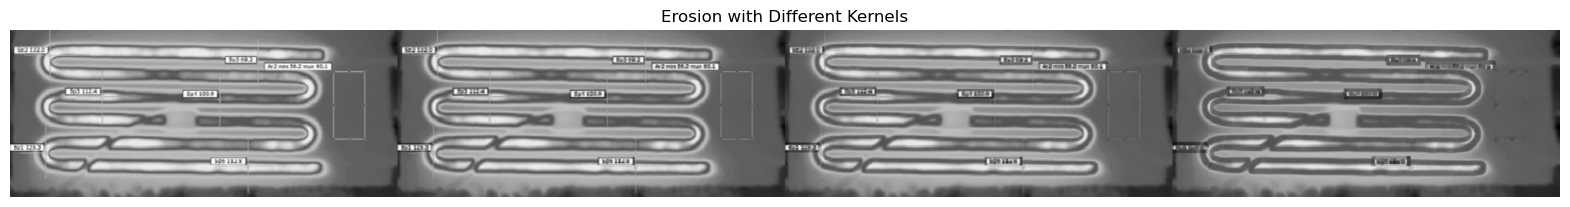

In [96]:
kernels = {
    '3x3': np.ones((3, 3), np.uint8),
    '5x5': np.ones((5, 5), np.uint8),
    '9x9': np.ones((9, 9), np.uint8)
}
erosions = [cv2.erode(image, kernel, iterations=1) for kernel in kernels.values()]

titles = ['Original'] + list(kernels.keys())
results = [image] + erosions
comparison = np.hstack(results)

plt.figure(figsize=(20, 20))
plt.imshow(comparison, cmap='gray')
plt.title('Erosion with Different Kernels')
plt.axis('off')
plt.show()


### 2. Dilation

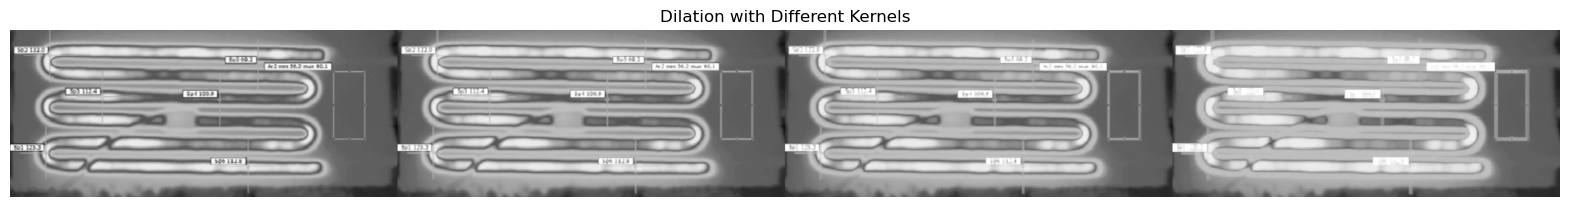

In [99]:
dilations = [cv2.dilate(image, kernel, iterations=1) for kernel in kernels.values()]

results = [image] + dilations
comparison = np.hstack(results)

plt.figure(figsize=(20, 20))
plt.imshow(comparison, cmap='gray')
plt.title('Dilation with Different Kernels')
plt.axis('off')
plt.show()

### 3. Opening
Opening is just another name of erosion followed by dilation. It is useful in removing noise, as we explained above. Here we use the function, cv.morphologyEx()

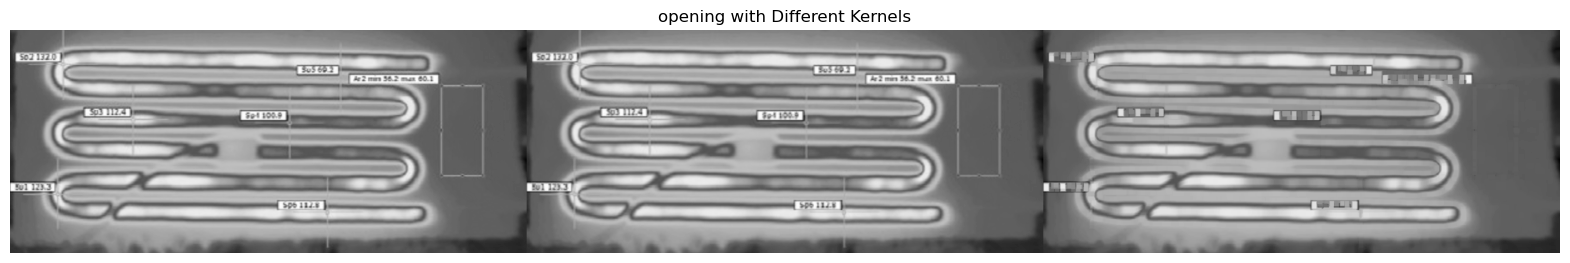

In [104]:
kernels_ = {
    '3x3': np.ones((3, 3), np.uint8),
    '9x9': np.ones((9, 9), np.uint8)
}
opening = [cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel) for kernel in kernels_.values()]

results = [image] + opening
comparison = np.hstack(results)

plt.figure(figsize=(20, 20))
plt.imshow(comparison, cmap='gray')
plt.title('opening with Different Kernels')
plt.axis('off')
plt.show()

### 4. Closing

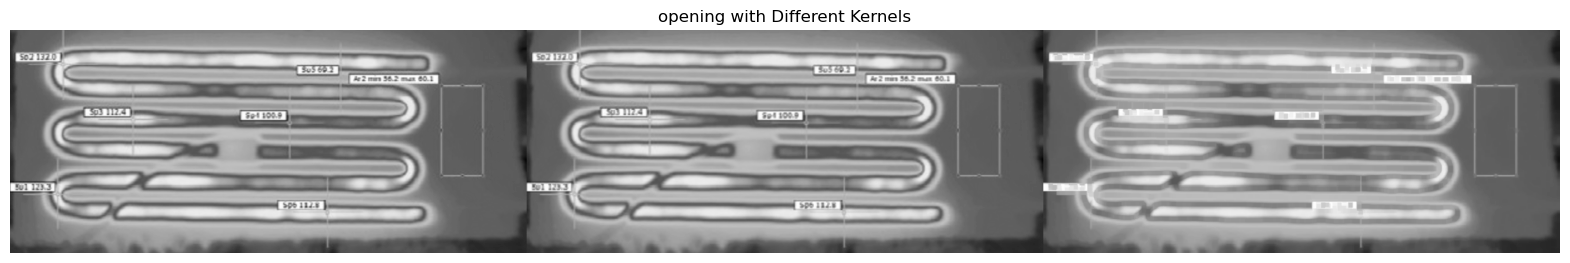

In [105]:
closings = [cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel) for kernel in kernels_.values()]

results = [image] + closings
comparison = np.hstack(results)

plt.figure(figsize=(20, 20))
plt.imshow(comparison, cmap='gray')
plt.title('opening with Different Kernels')
plt.axis('off')
plt.show()

### 5. Morphological Gradient

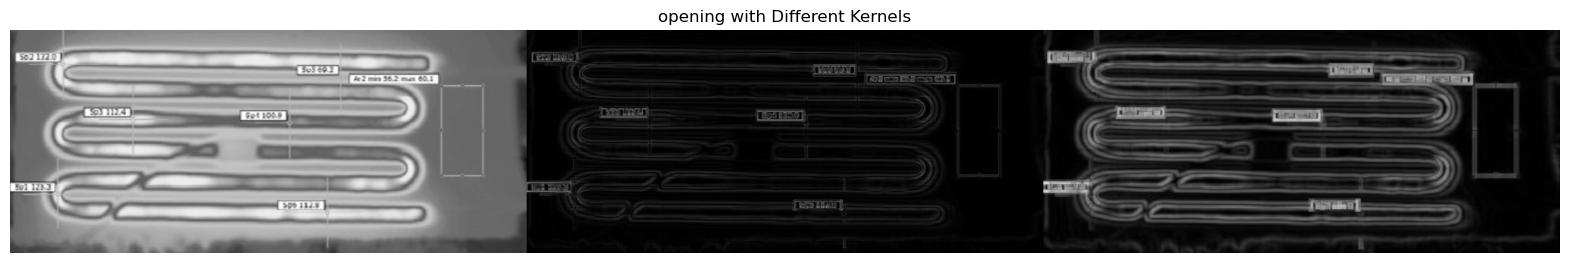

In [106]:
gradient = [cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel) for kernel in kernels_.values()]

results = [image] + gradient
comparison = np.hstack(results)

plt.figure(figsize=(20, 20))
plt.imshow(comparison, cmap='gray')
plt.title('opening with Different Kernels')
plt.axis('off')
plt.show()

## CANNY

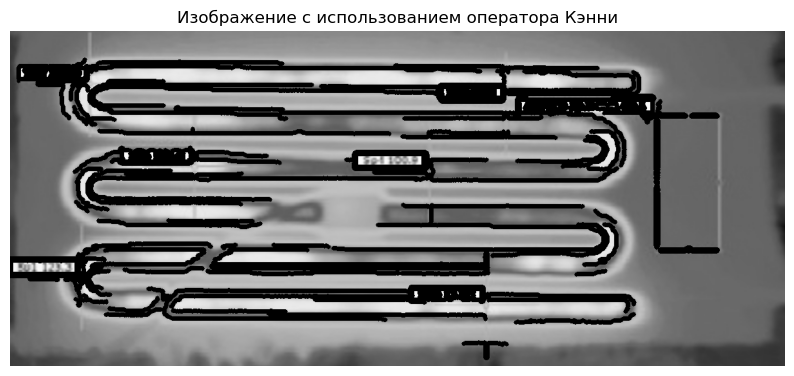

CPU times: user 197 ms, sys: 53.6 ms, total: 250 ms
Wall time: 183 ms


In [7]:
%%time

edges = cv2.Canny(image_8bit, 10, 150)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

mask = image_8bit.copy()
cv2.drawContours(mask, contours, -1, (0, 0, 0), 6)

mask_image = cv2.bitwise_and(image_8bit, mask)

masked_image_rgb = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.imshow(masked_image_rgb)
plt.title('Изображение с использованием оператора Кэнни')
plt.axis('off')
plt.show()

для точного пересчета цветов в температуру нужны метаданные (калибровка тепловизора).  EXIF или LUT (таблица соответствия температур и пикселей)



In [19]:
image_8bit_grain = cv2.imread("/home/angelika/Desktop/8_term/R_D/ref/termo_ref.png", cv2.IMREAD_GRAYSCALE)
#image_grain = image_8bit_grain.astype(np.int16)
norm_image_grain = cv2.normalize(image_grain, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
equ = cv2.equalizeHist(norm_image_grain)
separator = np.ones((image_8bit_grain.shape[0], 10), dtype=np.uint8) * 255  # белая полоса


res = [norm_image_grain, separator, norm_image, separator, equ]
comparison = np.hstack(res)


plt.figure(figsize=(10, 6))
plt.imshow(comparison)
plt.title('Normalised_Original_equalizeHist')
plt.axis('off')
plt.show()

NameError: name 'image_grain' is not defined

In [20]:
thresh_1 = cv2.adaptiveThreshold(norm_image_grain, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                               cv2.THRESH_BINARY, 101, 11)

contours, _ = cv2.findContours(thresh_1, 1, 2)
mask = norm_image_grain.copy()



cv2.drawContours(mask, contours, -1, (0, 0, 0), 6)

mask_image = cv2.bitwise_and(norm_image_grain, mask)

masked_image_rgb1 = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)
# kernel = np.ones((5, 5), np.uint8)
# masked_image_rgb1 = cv2.morphologyEx(masked_image_rgb1, cv2.MORPH_OPEN, kernel, iterations=1)

# Фильтруем контуры по площади — оставляем только крупные
min_contour_area = 200  # Подбери подходящее значение под твои данные

filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Создаем маску только с крупными контурами
filtered_mask = np.zeros_like(norm_image_grain)
cv2.drawContours(filtered_mask, filtered_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Применяем маску
filtered_result = cv2.bitwise_and(norm_image_grain, filtered_mask)

# Дополнительно очищаем шумы с помощью морфологических операций
kernel = np.ones((5, 5), np.uint8)
filtered_result = cv2.morphologyEx(filtered_result, cv2.MORPH_OPEN, kernel, iterations=2)

plt.figure(figsize=(10, 6))
plt.imshow(filtered_result)
plt.title('norm_without noise')
plt.axis('off')
plt.show()

image = cv2.imread("/home/angelika/Desktop/8_term/R_D/ref/termo_ref.png", cv2.IMREAD_COLOR)
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.title('original')
plt.axis('off')
plt.show()


NameError: name 'norm_image_grain' is not defined

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Адаптивная бинаризация
thresh_1 = cv2.adaptiveThreshold(norm_image_grain, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY, 101, 11)

# Поиск контуров
contours, _ = cv2.findContours(thresh_1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = norm_image_grain.copy()
cv2.drawContours(mask, contours, -1, (0, 0, 0), 6)

# Применение маски
mask_image = cv2.bitwise_and(norm_image_grain, mask)
masked_image_rgb1 = cv2.cvtColor(mask_image, cv2.COLOR_BGR2RGB)

# Фильтрация контуров по площади
min_contour_area = 200
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_contour_area]

# Подготовка данных для кластеризации (средняя яркость по каждому контуру)
brightness = []
for cnt in filtered_contours:
    mask = np.zeros_like(norm_image_grain)
    cv2.drawContours(mask, [cnt], -1, (255, 255, 255), thickness=cv2.FILLED)
    mean_val = cv2.mean(norm_image_grain, mask=mask)[0]
    brightness.append(mean_val)

brightness = np.array(brightness).reshape(-1, 1)

# K-means кластеризация
k = 5 # количество кластеров
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, _ = cv2.kmeans(brightness.astype(np.float32), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Рисование эллипсов и окрашивание по кластерам
output = norm_image_grain.copy()
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]

for i, cnt in enumerate(filtered_contours):
    if len(cnt) >= 20:  # минимум 5 точек нужно для fitEllipse
        ellipse = cv2.fitEllipse(cnt)
        color = colors[labels[i][0]]
        cv2.ellipse(output, ellipse, color, 2)

# Визуализация результата
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Ellipses with Brightness Clustering')
plt.axis('off')
plt.show()

# Сохранение результата
cv2.imwrite('ellipses_with_clusters.png', output)

IndexError: list index out of range